In [51]:
%matplotlib inline

In [52]:
from matplotlib import pyplot as plt

In [53]:
import numpy as np

In [96]:
import os

In [54]:
data = [[3, 1.5, 1], 
        [2, 1, 0],
        [4, 1.5, 1],
        [3, 1, 0],
        [3.5, 0.5, 1],
        [2, 0.5, 0],
        [5.5, 1, 1],
        [1, 1, 0]]

mystery_flower = [4.5, 1]

In [55]:
def sigmoid(x):
    return (1/(1+np.exp(-x)))

def sigmoid_p(x):
    return sigmoid(x) * (1-sigmoid(x))

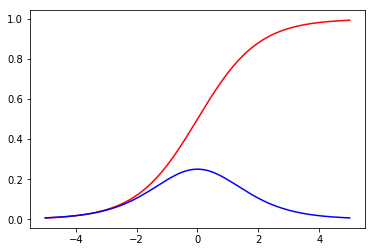

In [66]:
T = np.linspace(-5, 5, 200)
Y = sigmoid (T)
Z = sigmoid_p(T)
plt.plot(T,Y, c = 'r')
plt.plot(T,Z, c = 'b')



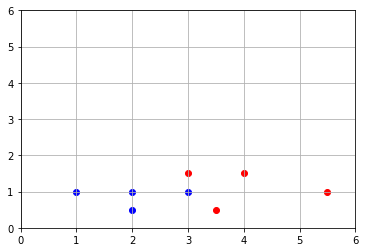

In [69]:
#practice scattering data
plt.axis([0, 6, 0, 6])
plt.grid()
for i in range(len(data)):
  point = data[i]
  color = "r"
  if point[2] == 0:
    color = "b"
  plt.scatter(point[0], point[1], c = color)

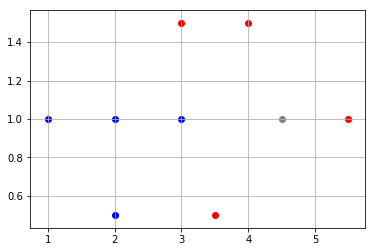

In [67]:
def visualize_data():
    plt.grid()

    for i in range(len(data)):
        c = 'r' #set point color to red
        if data[i][2] == 0:
            c = 'b' #change point color to blue if initial guess is 0 (which is blue)
        plt.scatter([data[i][0]], [data[i][1]], c=c)

    plt.scatter([mysteryFlower[0]], [mysteryFlower[1]], c='gray') #mystery flower color is gray

visualize_data()

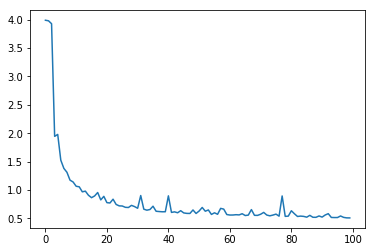

In [93]:
#training loop
def training_loop(): 
    #initialize the weights and bias to random values
    weight1 = np.random.randn()
    weight2 = np.random.randn()
    bias = np.random.rand()
    
    learning_rate = 0.1
    costs = []

    for i in range(10000):
        #getting random point
        random_index = np.random.randint(len(data))
        point = data[random_index]
    
        z = point[0] * weight1 + point[1] * weight2 + bias
        predicted = sigmoid(z)
    
        target = point[2]

        # current cost
        cost = np.square(predicted - target)
    
    
        if i % 100 == 0:
            cost_sum = 0
            for j in range(len(data)):
                point = data[j]
                z = point[0] * weight1 + point[1] * weight2 + bias
                point_prediction = sigmoid(z)
                cost_sum += np.square(point_prediction - target)
                
            costs.append(cost_sum)
        
        
        #manual differentiation for practice 
    
        dCost_dPrediction = 2 * (predicted - target)
        dPrediction_dZ = sigmoid_p(z)
        dZ_dW1 = point[0]
        dZ_dW2 = point[1]
        dZ_dB = 1
        dCost_dW1 = dCost_dPrediction * dPrediction_dZ * dZ_dW1
        dCost_dW2 = dCost_dPrediction * dPrediction_dZ * dZ_dW2
        dCost_dB = dCost_dPrediction * dPrediction_dZ * dZ_dB
        
        weight1 = weight1 - learning_rate * dCost_dW1
        weight2 = weight2 - learning_rate * dCost_dW2
        bias = bias - learning_rate * dCost_dB
    return costs, weight1, weight2, bias
        
costs, weight1, weight2, bias = train()

figure = plt.plot(costs)
        




In [94]:
#mystery flower prediction
z = weight1 * mystery_flower[0] + weight2 * mystery_flower[1] + bias
predicted = sigmoid(z)

print(predicted)
print("close to 0 -> blue, close to 1 -> red")

0.9556369343379303
close to 0 -> blue, close to 1 -> red


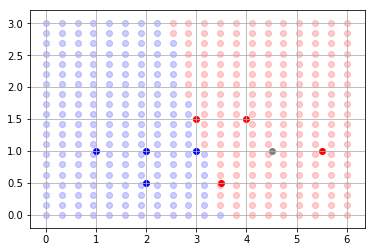

In [95]:
# check out the networks predictions in the x,y plane
for x in np.linspace(0, 6, 20):
    for y in np.linspace(0, 3, 20):
        pred = sigmoid(weight1 * x + weight2 * y + b)
        c = 'b'
        if pred > .5:
            c = 'r'
        plt.scatter([x],[y],c=c, alpha=.2)
        
# plot points over network predictions
# you should see a split, with half the predictions blue
# and the other half red.. nicely predicting each data point!
visualize_data()

In [ ]:
def mystery_flowers(length, width):
    z = weight1 * length + weight2 * width + bias
    prediction = sigmoid(z)
    if prediction < 0.5:
        os.system("say blue")
    else: 
        os.system("say red")